## scikit-learn digits dataset example

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
import sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.GaussianKernel import GaussianKernel, GaussianKernel2, GaussianKernel3

# or copy and paste the definition of `GaussianKernel` here.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from keras.layers import Input, Embedding, LSTM, GRU, Dense, Dropout, Lambda, \
    Conv1D, Conv2D, Conv3D, \
    Conv2DTranspose, \
    AveragePooling1D, \
    MaxPooling1D, MaxPooling2D, MaxPooling3D, \
    GlobalAveragePooling1D, \
    GlobalMaxPooling1D, GlobalMaxPooling2D, \
    LocallyConnected1D, LocallyConnected2D, \
    concatenate, Flatten, Average, Activation, \
    RepeatVector, Permute, Reshape, Dot, \
    multiply, dot, add, \
    PReLU, \
    Bidirectional, TimeDistributed, \
    SpatialDropout1D, \
    BatchNormalization
from keras.models import Model, Sequential
from keras import losses
from keras.callbacks import BaseLogger, ProgbarLogger, Callback, History
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from keras import initializers
from keras.metrics import categorical_accuracy
from keras.constraints import maxnorm, non_neg
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras import backend as K

In [4]:
digits = load_digits()
X, y = digits.data, digits.target

In [5]:
X = X.reshape((X.shape[0], -1))

In [6]:
X_sc = X / 16.0
X_sc.shape

(1797, 64)

In [7]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.4, random_state=0)
print(X_sc_train.shape)
print(X_sc_test.shape)
print(y_train.shape)
print(y_test.shape)

(1078, 64)
(719, 64)
(1078,)
(719,)


In [8]:
y_cat = to_categorical(y)
y_cat.shape

(1797, 10)

In [9]:
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(1078, 10)

In [10]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape

(719, 10)

In [11]:
def get_lm(smpl, y, num_lm0=20, random_state=0):
    cls = sorted(np.unique(y))
    np.random.seed(random_state)
    num_feature = np.prod(smpl.shape[1:])
    shape = np.hstack([num_lm0, smpl.shape[1:]])
    num_lm = num_lm0 * len(cls)
    init_list = []
    for ii in cls:
        init_wgt0 = smpl[y==ii]
        init_wgt0 = init_wgt0[np.random.choice(range(init_wgt0.shape[0]), size=num_lm0, replace=False)] + \
                    np.random.normal(scale=0.002, size=num_lm0*num_feature).reshape(shape)
        init_list.append(init_wgt0)
    init_wgt = np.vstack(init_list)
    init_wgt = init_wgt[np.random.permutation(range(init_wgt.shape[0]))]
    return init_wgt

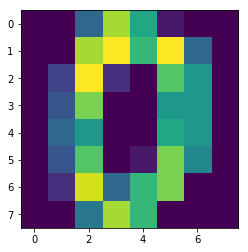

In [12]:
plt.imshow(X[0].reshape((8,8)))

### create model

In [13]:
'''
chose landmarks on input data
pick 20 data each digit
'''
num_lm0 = 20
num_lm = num_lm0 * 10

init_wgt = get_lm(X_sc_train, y_train, num_lm0=num_lm0)
init_wgt.shape

(200, 64)

In [14]:
'''
chose landmarks randomly for gk2
'''
#num_lm2 = 200
num_lm2 = 10
init_lm2 = np.random.random_sample((num_lm2, num_lm))
print(init_lm2.shape)
init_lm2

(10, 200)


array([[ 0.72150955,  0.73561866,  0.82786211, ...,  0.41821092,
         0.89579757,  0.91663392],
       [ 0.53282433,  0.95938975,  0.4606461 , ...,  0.34725582,
         0.52960293,  0.74073731],
       [ 0.19641256,  0.93073513,  0.27859638, ...,  0.40815083,
         0.74430385,  0.842343  ],
       ..., 
       [ 0.03160016,  0.13718324,  0.13656883, ...,  0.02309561,
         0.84539496,  0.80830776],
       [ 0.99771232,  0.54711599,  0.12419023, ...,  0.12487177,
         0.31043308,  0.99672953],
       [ 0.1143734 ,  0.87510768,  0.00171543, ...,  0.69388459,
         0.66499431,  0.46904023]])

In [15]:
np.random.seed(0)

def make_modelz(wgt_embed=None):
    inp_img = Input(shape=(64,), name='input_img')
    
    x = Dense(10, activation='softmax')(inp_img)
    model = Model(inp_img, x)
    
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer='adam')
    
    return {
        'model': model,
    }

models = make_modelz()
model = models['model']
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


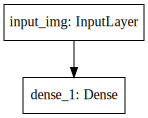

In [16]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### train

In [17]:
model.fit(X_sc_train,
          y_cat_train,
          validation_data=(X_sc_test, y_cat_test),
          verbose=0,
          batch_size=32,
          epochs=150)

In [18]:
model.fit(X_sc_train,
          y_cat_train,
          validation_data=(X_sc_test, y_cat_test),
          verbose=0,
          batch_size=32,
          epochs=150)

In [19]:
model.fit(X_sc_train,
          y_cat_train,
          validation_data=(X_sc_test, y_cat_test),
          verbose=0,
          batch_size=32,
          epochs=150)

### training data

In [20]:
pred_cls = models['model'].predict(X_sc_train)
pred_cls.shape

(1078, 10)

In [21]:
confusion_matrix(y_train, np.argmax(pred_cls, axis=1))

array([[118,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 109,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 106,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 118,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  93,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 105,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,  95,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 105]])

In [22]:
print(classification_report(y_train, np.argmax(pred_cls, axis=1)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       118
          1       0.99      1.00      1.00       109
          2       1.00      1.00      1.00       106
          3       1.00      1.00      1.00       113
          4       1.00      1.00      1.00       118
          5       1.00      1.00      1.00        93
          6       1.00      1.00      1.00       105
          7       1.00      1.00      1.00       114
          8       0.99      0.99      0.99        96
          9       1.00      0.99      1.00       106

avg / total       1.00      1.00      1.00      1078



### test data

In [23]:
pred_cls_test = models['model'].predict(X_sc_test)
pred_cls_test.shape

(719, 10)

In [24]:
confusion_matrix(y_test, np.argmax(pred_cls_test, axis=1))

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  1, 69,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 67,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 74,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 74,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  1,  0, 70]])

In [25]:
print(classification_report(y_test, np.argmax(pred_cls_test, axis=1)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.91      0.96      0.93        73
          2       1.00      0.97      0.99        71
          3       1.00      0.96      0.98        70
          4       0.98      1.00      0.99        63
          5       0.96      0.98      0.97        89
          6       0.97      0.97      0.97        76
          7       0.98      1.00      0.99        65
          8       0.95      0.95      0.95        78
          9       0.99      0.95      0.97        74

avg / total       0.97      0.97      0.97       719



In [26]:
f1_score(y_test, np.argmax(pred_cls_test, axis=1), average='macro')

0.97362282725845906